## 0. Setup

In [3]:
import torch
import torchvision
import torchvision.transforms as T
import matplotlib.pyplot as plt
from EIANN import Network
import EIANN.utils as ut
import EIANN.plot as pt

from tqdm.notebook import tqdm
import numpy as np
import matplotlib.gridspec as gs


pt.update_plot_defaults()


# Load dataset
tensor_flatten = T.Compose([T.ToTensor(), T.Lambda(torch.flatten)])
MNIST_train_dataset = torchvision.datasets.MNIST(root='../datasets/MNIST_data/', train=True, download=False,
                                         transform=tensor_flatten)
MNIST_test_dataset = torchvision.datasets.MNIST(root='../datasets/MNIST_data/',
                                        train=False, download=False,
                                        transform=tensor_flatten)

# Add index to train & test data
MNIST_train = []
for idx,(data,target) in enumerate(MNIST_train_dataset):
    target = torch.eye(len(MNIST_train_dataset.classes))[target]
    MNIST_train.append((idx, data, target))
    
MNIST_test = []
for idx,(data,target) in enumerate(MNIST_test_dataset):
    target = torch.eye(len(MNIST_test_dataset.classes))[target]
    MNIST_test.append((idx, data, target))
    
# Put data in dataloader
data_generator = torch.Generator()
train_dataloader = torch.utils.data.DataLoader(MNIST_train, shuffle=True, generator=data_generator)
train_sub_dataloader = torch.utils.data.DataLoader(MNIST_train[0:10000], shuffle=True, generator=data_generator)
val_dataloader = torch.utils.data.DataLoader(MNIST_train[-10000:], batch_size=10000, shuffle=False)
test_dataloader = torch.utils.data.DataLoader(MNIST_test, batch_size=10000, shuffle=False)

epochs = 1
data_seed = 0
network_seed = 42

# Backprop network

In [4]:
# Create network
network_name = "EIANN_1_hidden_mnist_backprop_relu_SGD_config"
network_config = ut.read_from_yaml(f'../config/MNIST/{network_name}.yaml')

layer_config = network_config['layer_config']
projection_config = network_config['projection_config']
training_kwargs = network_config['training_kwargs']

bp_network = Network(layer_config, projection_config, seed=network_seed, **training_kwargs)

Batch accuracy = 93.33999633789062%


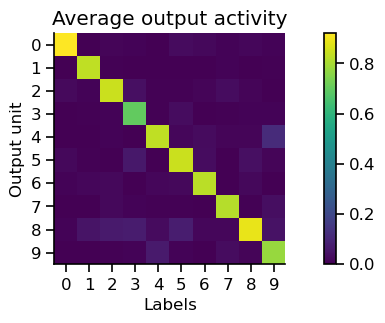

In [10]:
# Load pretrained network
saved_network_path = f"saved_networks/{network_name}/epoch0_step10000.pt"
bp_network.load_state_dict(torch.load(saved_network_path))

pt.plot_batch_accuracy(bp_network, test_dataloader)

In [ ]:
# # Train network
# data_generator.manual_seed(data_seed)
# bp_network.train_and_validate(train_sub_dataloader, 
#                               test_dataloader, 
#                               epochs=epochs,
#                               val_interval=(0,-1,1000),
#                               store_history=False, 
#                               store_weights=False,
#                               export_weights_path=f"saved_networks/{network_name}",
#                               status_bar=True)

# pt.plot_batch_accuracy(bp_network, test_dataloader)
# plt.figure()
# pt.plot_train_loss_history(bp_network)
# plt.title('Train loss')
# plt.show()

# # pt.plot_test_loss_history(bp_network, test_dataloader, stepsize=50)
# # pt.plot_MNIST_examples(bp_network, test_dataloader)
# plt.figure()
# plt.plot(bp_network.val_loss_history)
# plt.title('Loss')
# plt.show()

  0%|          | 0/10000 [00:00<?, ?it/s]

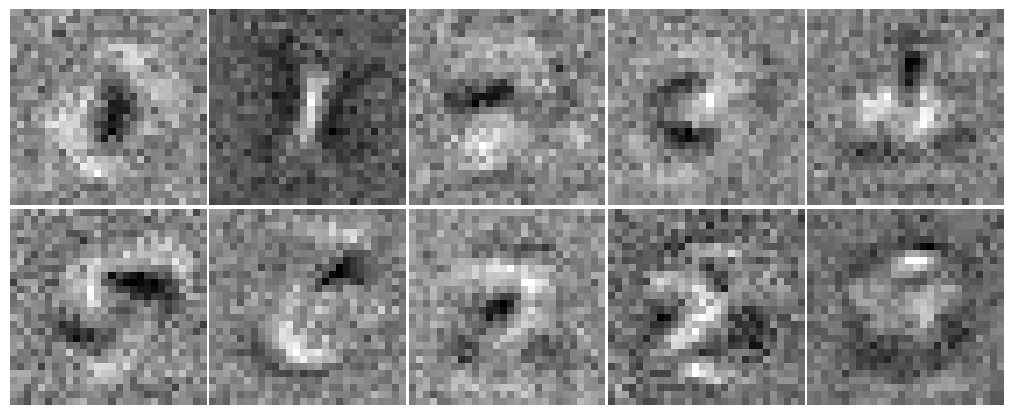

In [11]:
pt.plot_receptive_fields(bp_network.Output.E, test_dataloader)

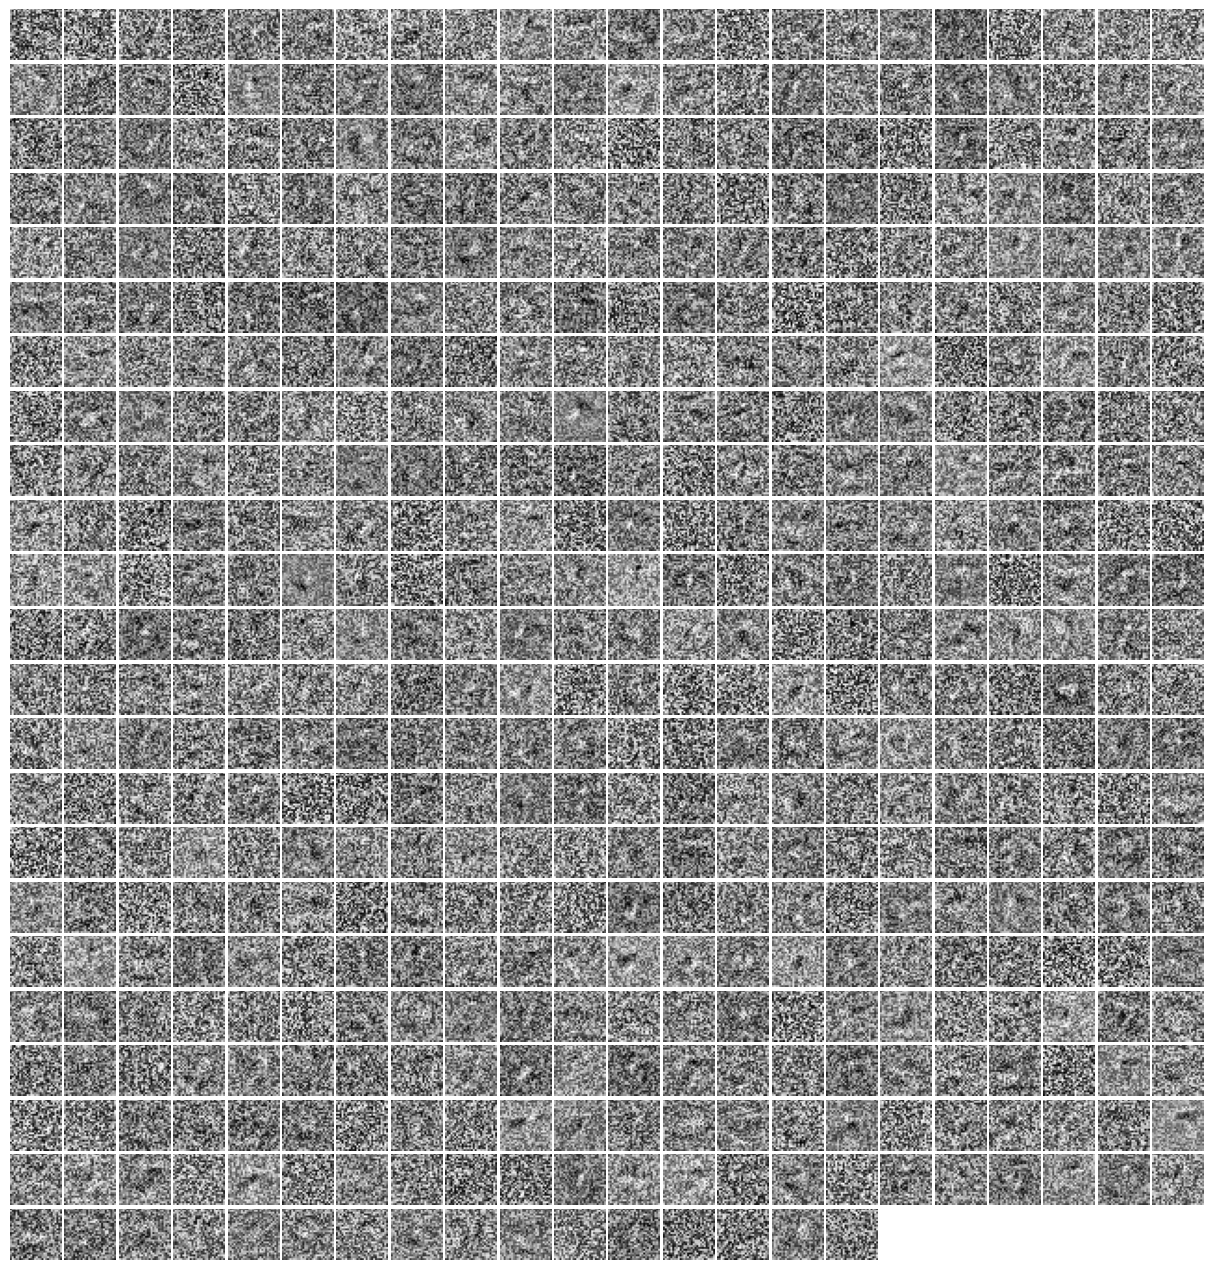

In [12]:
pt.plot_hidden_weights(bp_network.module_dict['H1E_InputE'].weight)

In [8]:
H1E_rf = bp_network.module_dict['H1E_InputE'].weight.detach()

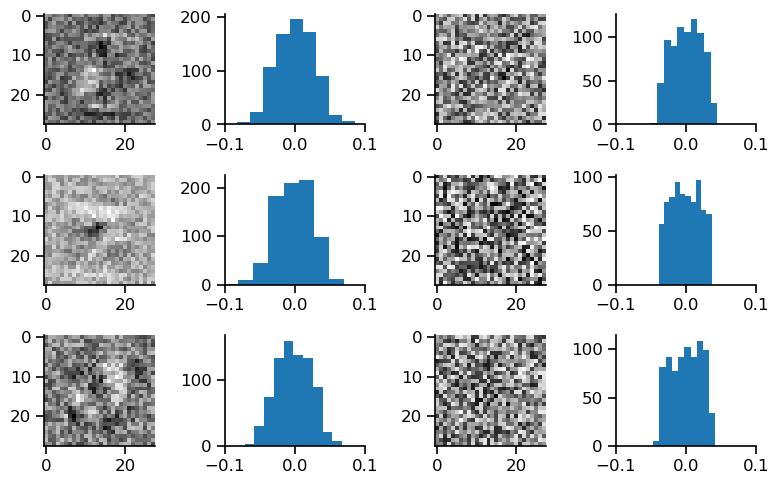

In [72]:
fig,ax = plt.subplots(3,4,figsize=(8,5))

unit = 18
ax[0,0].imshow(H1E_rf[unit].view(28,28),cmap='gray')
ax[0,1].hist(H1E_rf[unit])
ax[0,1].set_xlim([-0.1,0.1])

unit = 87
ax[1,0].imshow(H1E_rf[unit].view(28,28),cmap='gray')
ax[1,1].hist(H1E_rf[unit])
ax[1,1].set_xlim([-0.1,0.1])

unit = 1
ax[0,2].imshow(H1E_rf[unit].view(28,28),cmap='gray')
ax[0,3].hist(H1E_rf[unit])
ax[0,3].set_xlim([-0.1,0.1])

unit = 19
ax[1,2].imshow(H1E_rf[unit].view(28,28),cmap='gray')
ax[1,3].hist(H1E_rf[unit])
ax[1,3].set_xlim([-0.1,0.1])


unit = 300
ax[2,0].imshow(H1E_rf[unit].view(28,28),cmap='gray')
ax[2,1].hist(H1E_rf[unit])
ax[2,1].set_xlim([-0.1,0.1])

unit = 200
ax[2,2].imshow(H1E_rf[unit].view(28,28),cmap='gray')
ax[2,3].hist(H1E_rf[unit])
ax[2,3].set_xlim([-0.1,0.1])


fig.tight_layout()
plt.show()

In [71]:
fields = ut.compute_receptive_fields(bp_network.H1.E, test_dataloader)

  0%|          | 0/10000 [00:00<?, ?it/s]

In [88]:
fields.shape

torch.Size([500, 784])

In [113]:
for i,unit in enumerate(fields):
    fields[i] = (unit-torch.min(unit)) / (torch.max(unit) - torch.min(unit)) - 0.5

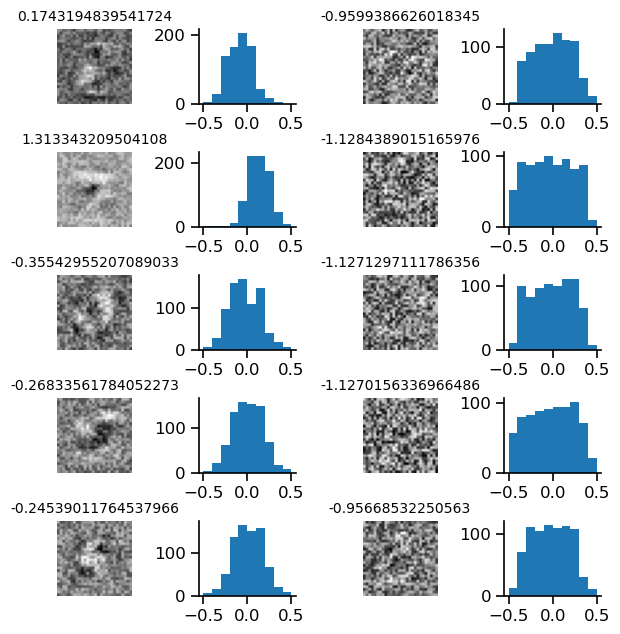

In [115]:
from scipy.stats import kurtosis

fig, ax = plt.subplots(5, 4, figsize=(6, 6.5))

units = [18,87,300,304,305]
for i, unit in enumerate(units):
    row = i
    col = 0
    ax[row, col].imshow(fields[unit].view(28, 28), cmap='gray')
    ax[row, col].axis('off')
    ax[row, col+1].hist(fields[unit])
    ax[row, col].set_title(kurtosis(fields[unit], fisher=False)-3,fontsize=10)

units = [1,19,200,499,204]
for i, unit in enumerate(units):
    row = i
    col = 2
    ax[row, col].imshow(fields[unit].view(28, 28), cmap='gray')
    ax[row, col].axis('off')
    ax[row, col+1].hist(fields[unit])
    ax[row, col].set_title(kurtosis(fields[unit], fisher=False)-3,fontsize=10)


fig.tight_layout()
plt.show()

# Backprop Dale network

Epochs:   0%|          | 0/1 [00:00<?, ?it/s]

Samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Batch accuracy = 89.83000183105469%


/Users/ag1880/Github_repos/Milstein-Lab/EIANN/EIANN/plot.py:491: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/Users/ag1880/Github_repos/Milstein-Lab/EIANN/EIANN/plot.py:201: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


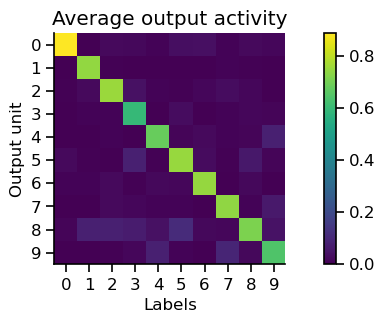

<Figure size 1000x300 with 0 Axes>

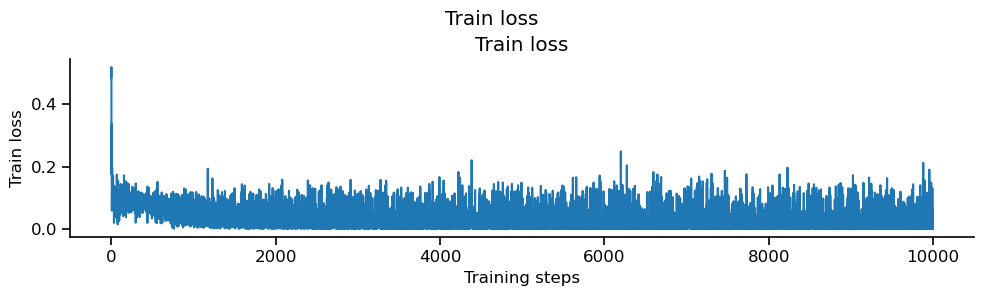

In [2]:
# Create network
network_config = ut.read_from_yaml('../config/MNIST/EIANN_1_hidden_mnist_backprop_Dale_relu_SGD_config.yaml')
# network_config = ut.read_from_yaml('../optimize/data/20230102_EIANN_1_hidden_mnist_bpDale_softplus_config.yaml')

layer_config = network_config['layer_config']
projection_config = network_config['projection_config']
training_kwargs = network_config['training_kwargs']

bpDale_network = Network(layer_config, projection_config, seed=network_seed, **training_kwargs)

# Train network
data_generator.manual_seed(data_seed)
bpDale_network.train_and_validate(train_sub_dataloader, 
                              test_dataloader, 
                              epochs=epochs,
                              val_interval=(-1,-1,1000),
                              store_history=True, 
                              store_weights=False, 
                              status_bar=True)

pt.plot_batch_accuracy(bpDale_network, test_dataloader)
plt.figure()
pt.plot_train_loss_history(bpDale_network)
plt.title('Train loss')
plt.show()

  0%|          | 0/10000 [00:00<?, ?it/s]

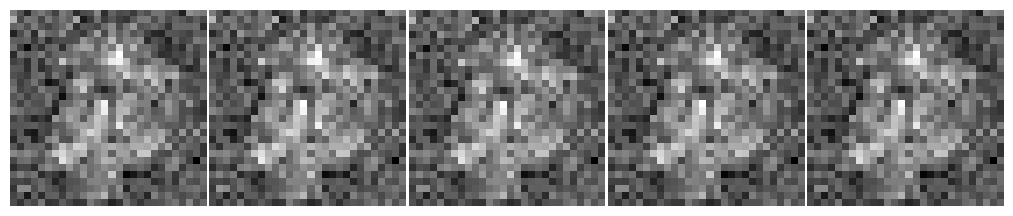

In [3]:
pt.plot_receptive_fields(bpDale_network.H1.FBI, test_dataloader)

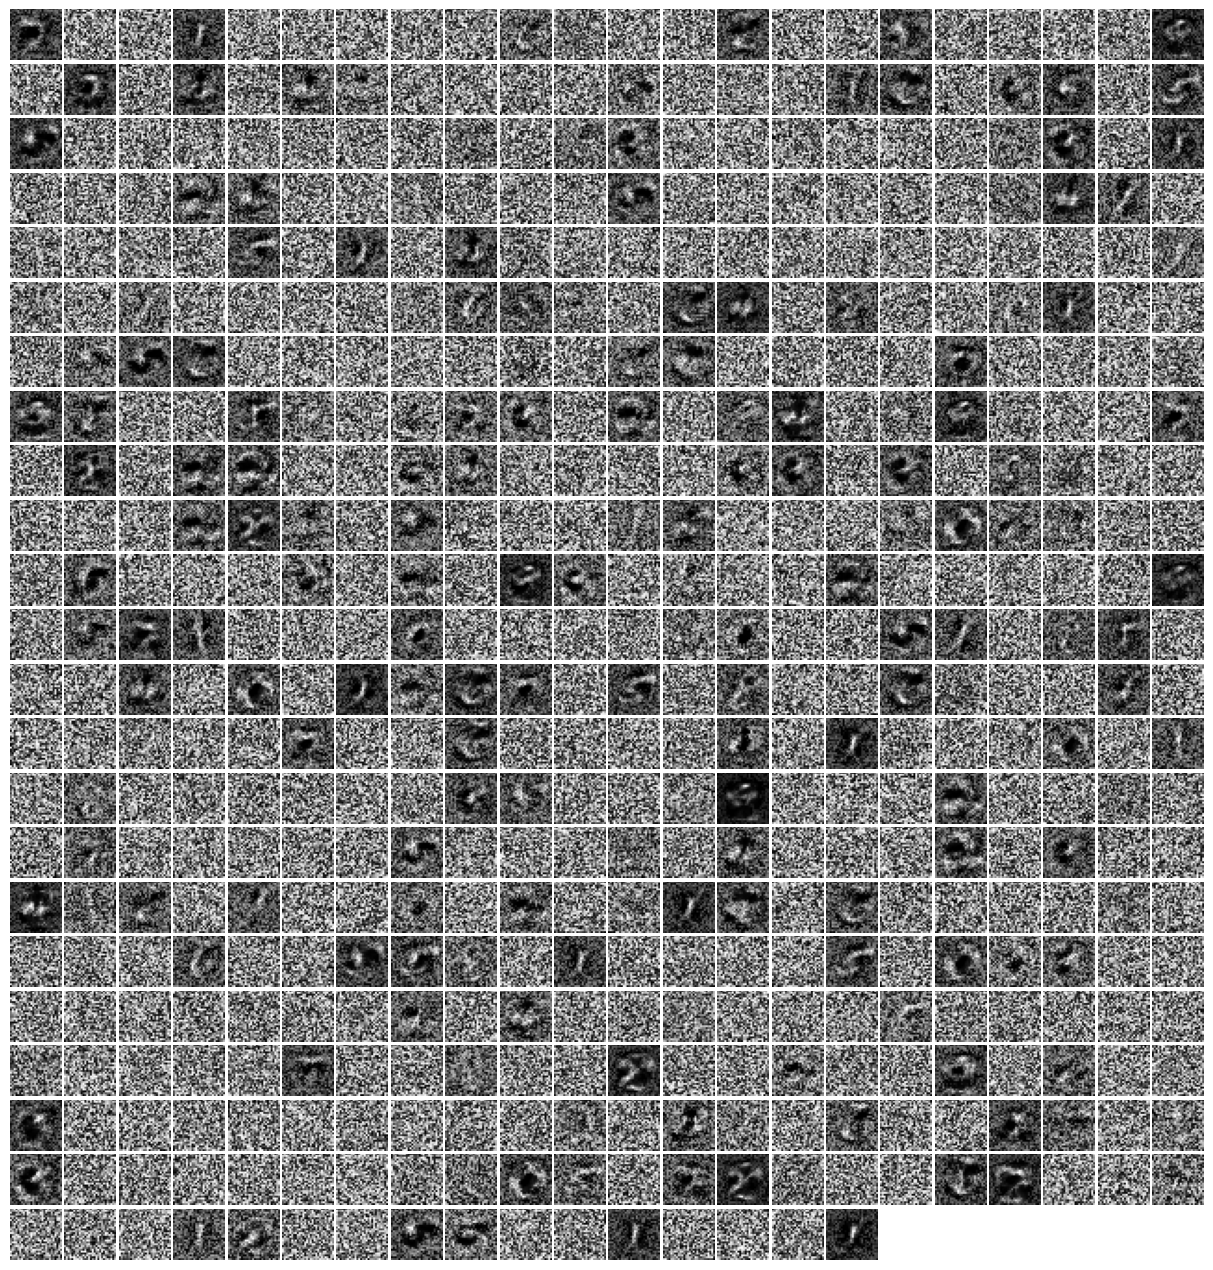

In [4]:
pt.plot_hidden_weights(bpDale_network.module_dict['H1E_InputE'].weight.detach())

In [ ]:
# pt.plot_receptive_fields(bpDale_network.Output.E, test_dataloader)

# Gjorgjieva Hebb network

Epochs:   0%|          | 0/1 [00:00<?, ?it/s]

Samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Batch accuracy = 9.729999542236328%


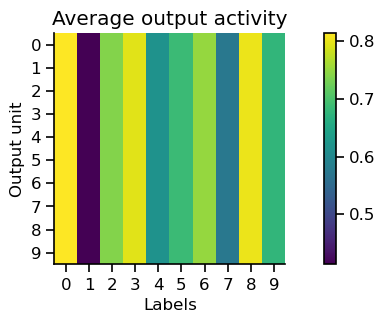

<Figure size 1000x300 with 0 Axes>

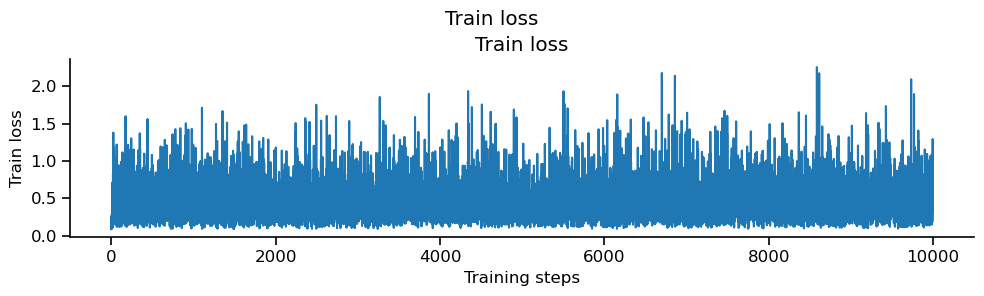

In [5]:
# Create network
# network_config = ut.read_from_yaml('../optimize/data/20221229_EIANN_1_hidden_mnist_Gjorgjieva_Hebb_config.yaml')
network_config = ut.read_from_yaml('../config/MNIST/EIANN_0_hidden_mnist_Gjorgjieva_Hebb_config.yaml')

layer_config = network_config['layer_config']
projection_config = network_config['projection_config']
training_kwargs = network_config['training_kwargs']

gj_network = Network(layer_config, projection_config, seed=network_seed, **training_kwargs)

# Train network
data_generator.manual_seed(data_seed)
gj_network.train_and_validate(train_sub_dataloader, 
                              test_dataloader, 
                              epochs=epochs,
                              val_interval=(0,-1,1000),
                              store_history=True, 
                              store_weights=False, 
                              store_weights_interval=(0, -1, 1000),
                              status_bar=True)

pt.plot_batch_accuracy(gj_network, test_dataloader)
plt.figure()
pt.plot_train_loss_history(gj_network)
plt.title('Train loss')
plt.show()

In [6]:
# pt.plot_hidden_weights(gj_network.module_dict['H1E_InputE'].weight)

  0%|          | 0/10000 [00:00<?, ?it/s]

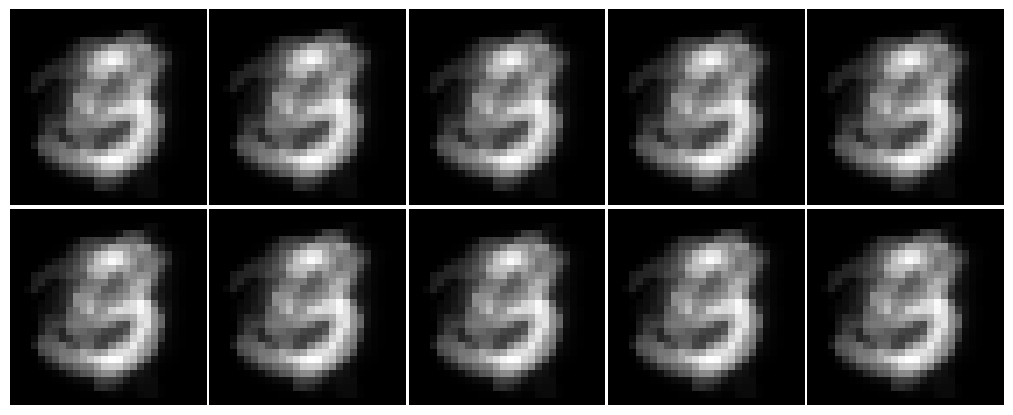

In [7]:
pt.plot_receptive_fields(gj_network.Output.E, test_dataloader)

# BTSP network

Epochs:   0%|          | 0/1 [00:00<?, ?it/s]

Samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Batch accuracy = 79.87000274658203%


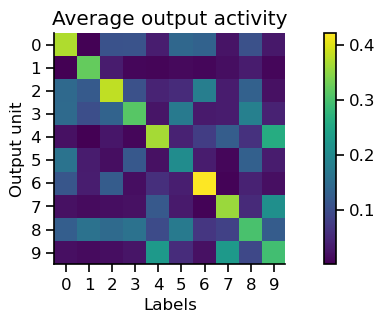

<Figure size 1000x300 with 0 Axes>

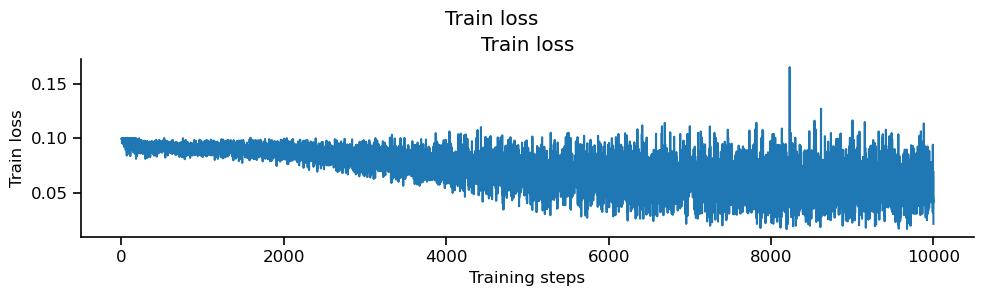

In [9]:
# Create network
network_config = ut.read_from_yaml('../optimize/data/20221227_EIANN_1_hidden_BTSP_config_E.yaml')

layer_config = network_config['layer_config']
projection_config = network_config['projection_config']
training_kwargs = network_config['training_kwargs']

btsp_network = Network(layer_config, projection_config, seed=network_seed, **training_kwargs)

# Train network
data_generator.manual_seed(data_seed)
btsp_network.train_and_validate(train_sub_dataloader, 
                              test_dataloader, 
                              epochs=epochs,
                              val_interval=(0,-1,1000),
                              store_history=False, 
                              store_weights=False, 
                              store_weights_interval=(0, -1, 1000),
                              status_bar=True)

pt.plot_batch_accuracy(btsp_network, test_dataloader)
plt.figure()
pt.plot_train_loss_history(btsp_network)
plt.title('Train loss')
plt.show()

  0%|          | 0/10000 [00:00<?, ?it/s]

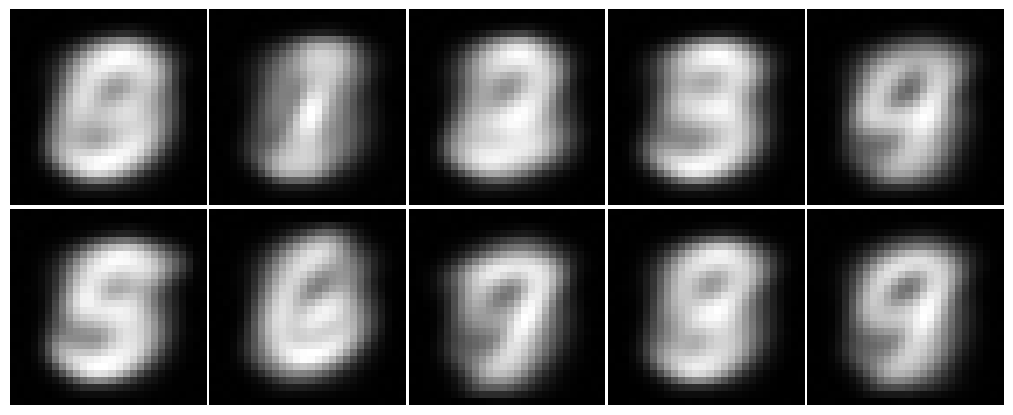

In [10]:
pt.plot_receptive_fields(btsp_network.Output.E, test_dataloader)

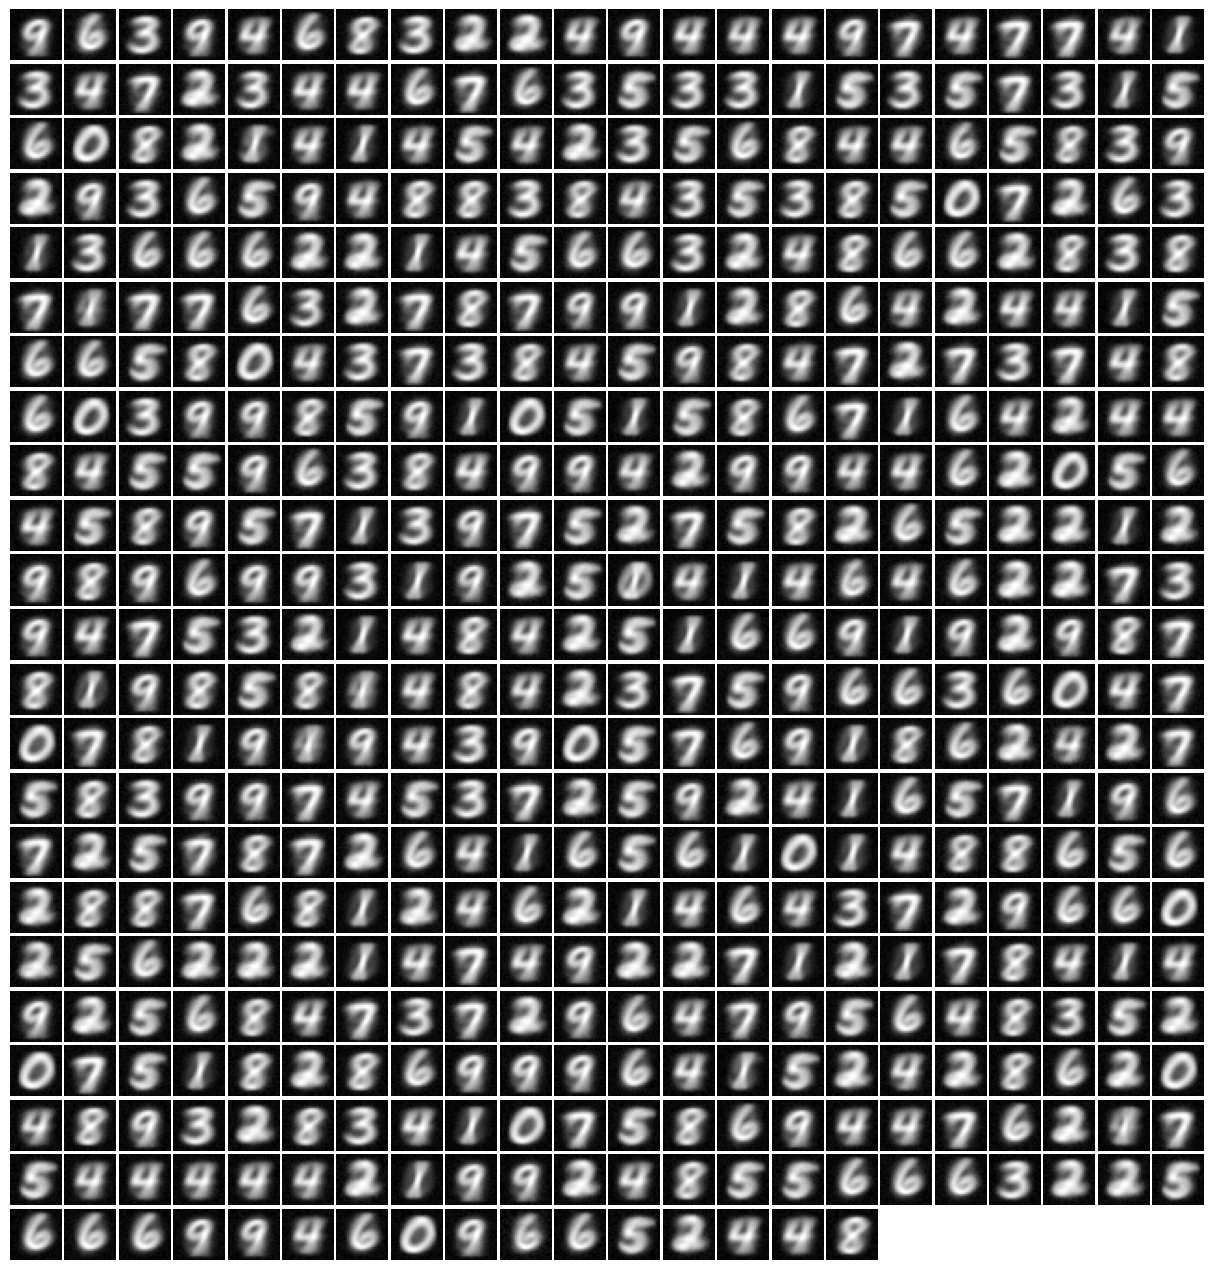

In [14]:
pt.plot_hidden_weights(btsp_network.module_dict['H1E_InputE'].weight)

  0%|          | 0/10000 [00:00<?, ?it/s]

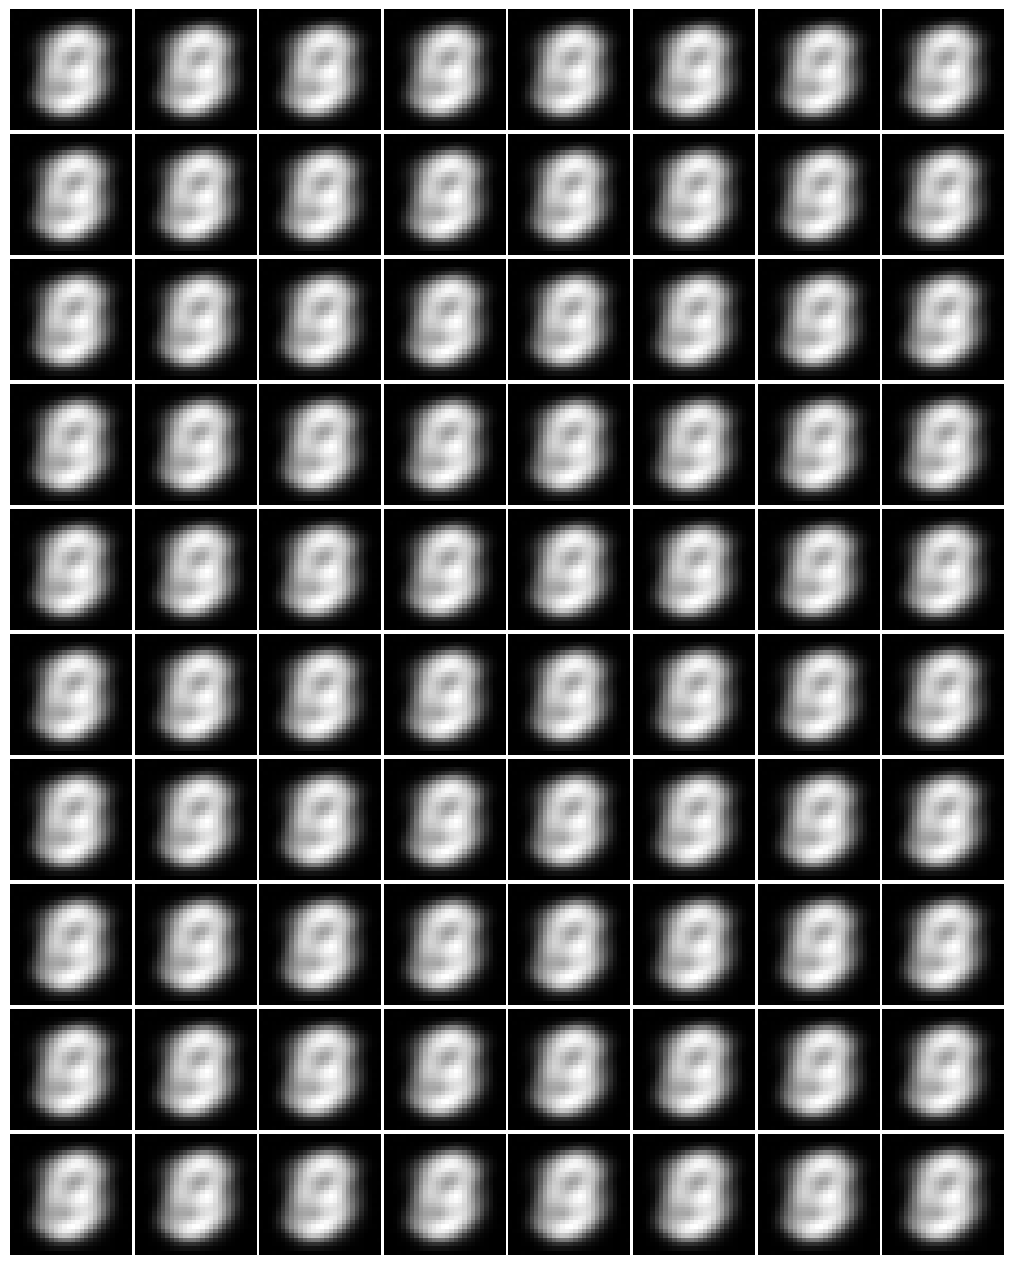

In [16]:
pt.plot_receptive_fields(btsp_network.H1.FBI, test_dataloader)

In [ ]:
pt.plot_receptive_fields(btsp_network.H1.E, test_dataloader)